In [1]:
import scipy.io 
import numpy as np 
import matplotlib.pyplot as plt 
import alphashape
from scipy.interpolate import interp1d
from shapely.geometry import Polygon, MultiPolygon

In [2]:
#file_path = r'C:\Users\josep\Desktop\Summer Research Project\white_pixels.mat'
data = scipy.io.loadmat('C:\\Users\josep\Downloads\processedEdges_sp3.mat') 

# Extract the frames 
processed_edges = data['processedEdges'] 

In [3]:
processed_edges[0,0].shape

(360, 1280)

# 1) Image

In [346]:
i = 30

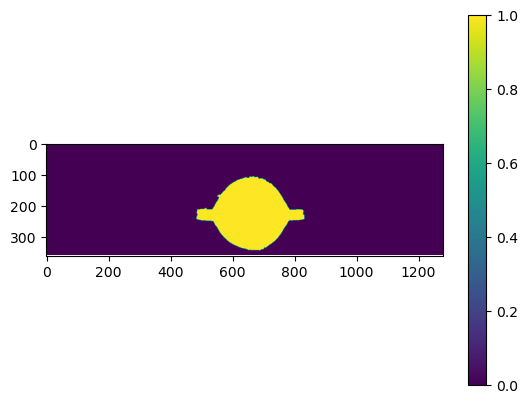

In [347]:
plt.imshow(processed_edges[0, i], cmap='viridis')  
plt.colorbar()  
plt.show()

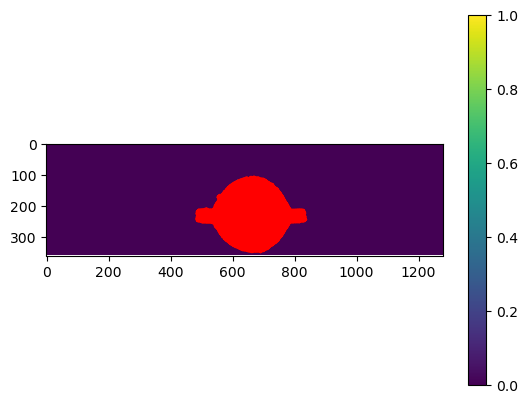

In [348]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming processed_edges[0, 30] is a 2D numpy array
# processed_edges = np.random.random((1, 31, 100, 100)) # Example data

# Extract the 2D array
data = processed_edges[0, i]

# Find indices where values are greater than 0.8
y, x = np.where(data > 0.8)

# Plot the 2D array
plt.imshow(data, cmap='viridis')
plt.colorbar()

# Overlay the points
plt.scatter(x, y, color='red', s=2)

# Show the plot
plt.show()


## 1.1) Split the Image

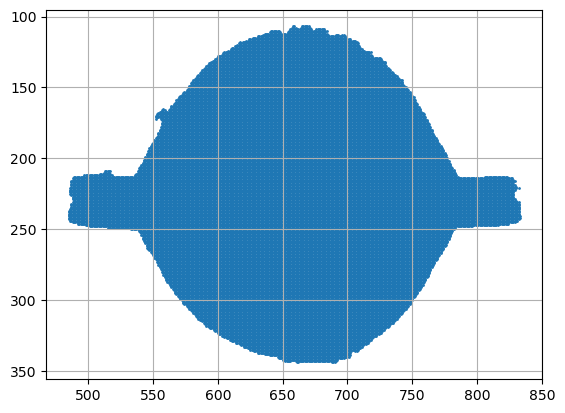

In [349]:
plt.figure()
plt.scatter(x, y, s = 1)
plt.grid(True)
plt.gca().invert_yaxis()
#plt.ylim(400,-200)
plt.show()

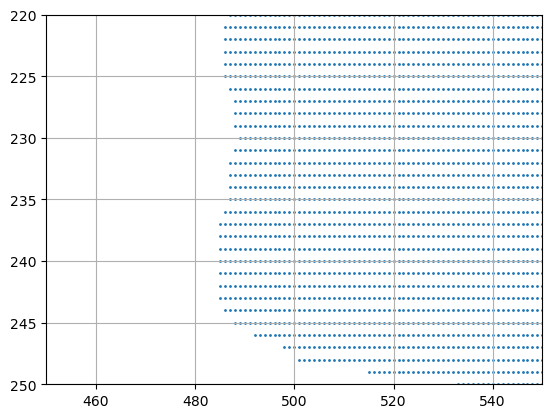

In [350]:
plt.figure()
plt.scatter(x, y, s = 1)
plt.grid(True)
plt.gca().invert_yaxis()
plt.ylim(250,220)
plt.xlim(450, 550)
plt.show()

In [351]:
y_line = 230

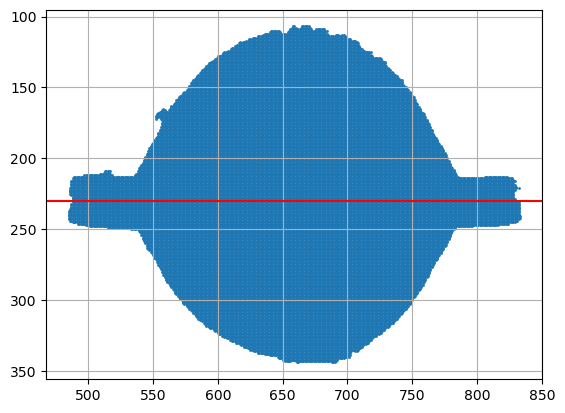

In [352]:
plt.figure()
plt.scatter(x, y, s = 1)
plt.grid(True)
plt.gca().invert_yaxis()

# Draw the horizontal line at 230
plt.axhline(y=y_line, color='r', linestyle='-')


#plt.ylim(400,-200)
plt.show()

## 1.2) Draw the Edge line 

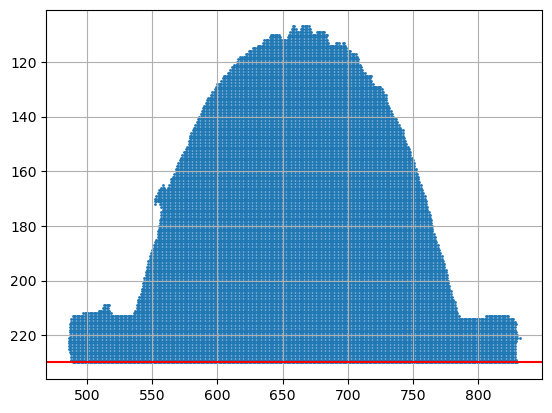

In [353]:
x_filtered = x[y <= y_line]
y_filtered = y[y <= y_line]

plt.figure()
plt.scatter(x_filtered, y_filtered, s=1)
plt.grid(True)
plt.gca().invert_yaxis()
#plt.ylim(400, -200)

plt.axhline(y=y_line, color='r', linestyle='-')
plt.show()

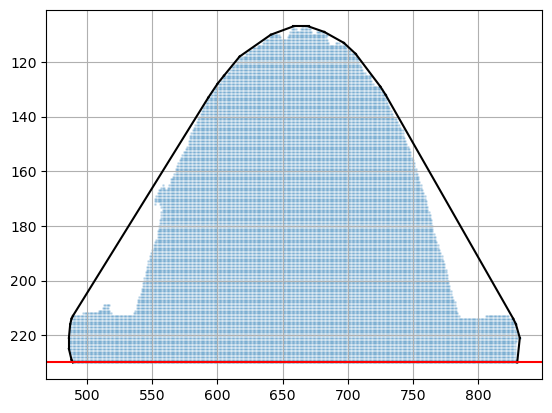

In [354]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

# Assuming x, y, and y_line are already defined
x_filtered = x[y <= y_line]
y_filtered = y[y <= y_line]

# Find the convex hull
points = np.vstack((x_filtered, y_filtered)).T
hull = ConvexHull(points)

# Plot the points
plt.figure()
plt.scatter(x_filtered, y_filtered, s=1, alpha=0.2)  # Plot all points with low opacity

# Plot the convex hull
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-', lw=1.5)  # Edge of the shape

plt.grid(True)
plt.gca().invert_yaxis()
plt.axhline(y=y_line, color='r', linestyle='-')
plt.show()


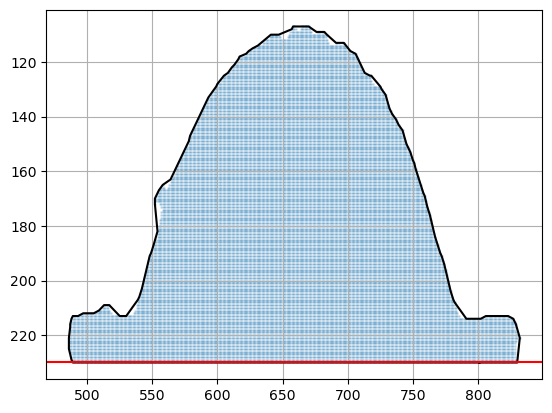

In [355]:
x_filtered = x[y <= y_line]
y_filtered = y[y <= y_line]

# Create points array
points = np.vstack((x_filtered, y_filtered)).T

# Compute the alpha shape with a suitable alpha value
alpha = 0.1  #
alpha_shape = alphashape.alphashape(points, alpha)

# Plot the alpha shape
plt.figure()
plt.scatter(x_filtered, y_filtered, s=1, alpha=0.2)  
# Check if the alpha shape is a Polygon or MultiPolygon and plot accordingly
if isinstance(alpha_shape, Polygon):
    x_edge, y_edge = alpha_shape.exterior.xy
    plt.plot(x_edge, y_edge, 'k-', lw=1.5)
elif isinstance(alpha_shape, MultiPolygon):
    for poly in alpha_shape:
        x_edge, y_edge = poly.exterior.xy
        plt.plot(x_edge, y_edge, 'k-', lw=1.5)

plt.grid(True)
plt.gca().invert_yaxis()
plt.axhline(y=y_line, color='r', linestyle='-')
plt.show()


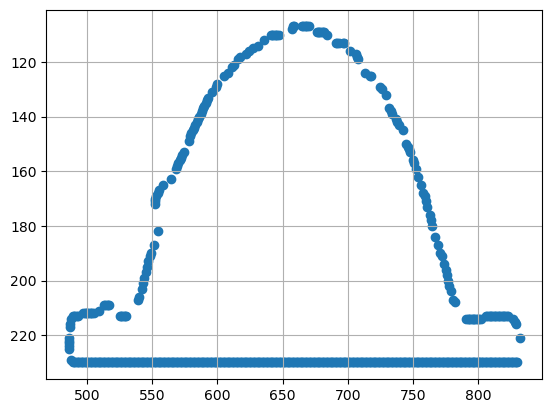

In [356]:
plt.scatter(x_edge, y_edge)
plt.grid(True)
plt.gca().invert_yaxis()

In [357]:
import matplotlib.pyplot as plt

def plot_extreme_x_points(x_edge, y_edge, target_y):
    """
    Plots the smallest and largest x values at target_y along with the other points.
    
    Parameters:
    x_edge (list): List of x coordinates.
    y_edge (list): List of y coordinates.
    target_y (int or float): The y value to filter the x values.
    """
    # Separate points at target_y and other points
    x_at_target_y = [x_edge[i] for i in range(len(y_edge)) if y_edge[i] == target_y]
    x_other = [x_edge[i] for i in range(len(y_edge)) if y_edge[i] != target_y]
    y_other = [y_edge[i] for i in range(len(y_edge)) if y_edge[i] != target_y]

    # Find the smallest and largest x values at target_y
    if x_at_target_y:  # Ensure there's at least one point at target_y
        x_min = min(x_at_target_y)
        x_max = max(x_at_target_y)

        # Create new lists for plotting the points at target_y
        x_filtered = [x_min, x_max]
        y_filtered = [target_y, target_y]

        # Plot the filtered points at target_y
        #plt.scatter(x_filtered, y_filtered, color='red', label=f'Points at y={target_y} (min/max x)')
    
    # Plot the other points
   # plt.scatter(x_other, y_other, color='blue', label='Other points')

    # Add grid, invert y-axis, and show plot
    #plt.grid(True)
    #plt.gca().invert_yaxis()
    #plt.legend()
    #plt.show()

    new_x = np.concatenate((x_filtered, x_other))
    new_y = np.concatenate((y_filtered, y_other))

    return new_x, new_y

    

target_y = 230

In [358]:
x_main_edge, y_main_edge = plot_extreme_x_points(x_edge, y_edge, target_y)

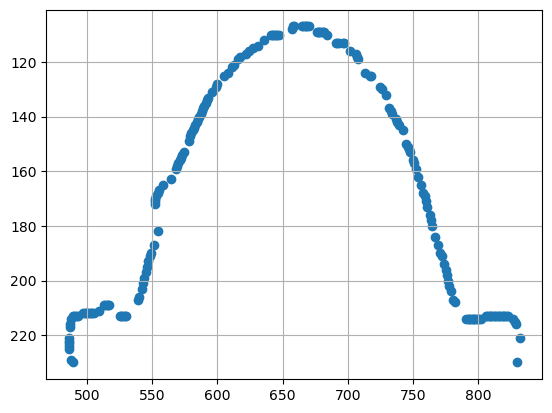

In [359]:
plt.scatter(x_main_edge, y_main_edge)
plt.grid(True)
plt.gca().invert_yaxis()

In [360]:
y_main_edge

array([230., 230., 221., 216., 215., 214., 213., 213., 213., 213., 213.,
       213., 213., 213., 213., 213., 213., 213., 213., 213., 213., 213.,
       213., 213., 214., 214., 214., 214., 214., 214., 214., 214., 214.,
       214., 214., 214., 208., 207., 204., 202., 200., 198., 196., 194.,
       191., 190., 187., 184., 180., 178., 176., 173., 171., 169., 168.,
       165., 162., 159., 157., 156., 153., 152., 151., 150., 145., 143.,
       142., 141., 139., 138., 137., 132., 130., 129., 125., 125., 124.,
       119., 118., 117., 116., 113., 113., 113., 113., 113., 110., 109.,
       109., 109., 109., 109., 109., 109., 107., 107., 107., 107., 107.,
       107., 107., 107., 108., 110., 110., 110., 110., 110., 110., 110.,
       112., 114., 115., 116., 117., 118., 119., 121., 122., 124., 125.,
       128., 129., 131., 133., 134., 135., 136., 137., 138., 139., 140.,
       141., 142., 143., 144., 145., 146., 147., 149., 153., 154., 155.,
       156., 157., 158., 159., 163., 165., 167., 16

## 1.3) Left Points

In [361]:
def check_unique_elements(array):
    seen = set()
    non_unique = []

    for element in array:
        if element in seen:
            if element not in non_unique:
                non_unique.append(element)
        else:
            seen.add(element)

    if not non_unique:
        print("All elements are unique.")
    else:
        print("Non-unique elements:", non_unique)

In [362]:
check_unique_elements(x_main_edge)

Non-unique elements: [552.0, 554.0, 489.0, 487.0, 486.0, 488.0]


In [363]:
from scipy.interpolate import interp1d

In [364]:
# This gets rid of half of the image. Then removes averages over duplicates in the y direction and 
# then performs a fitting with the y axis as the x axis

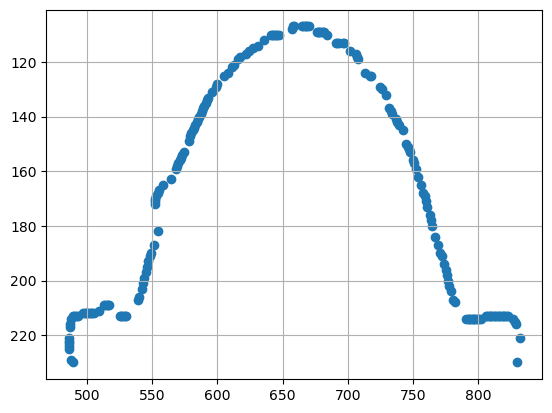

In [365]:
plt.scatter(x_main_edge, y_main_edge)
plt.grid(True)
plt.gca().invert_yaxis()

In [366]:
half_point = (np.min(x_main_edge) + np.max(x_main_edge)) / 2
half_point

659.0

In [367]:
half_mask = [x_main_edge < half_point][0]

In [368]:
x_half = x_main_edge[half_mask]
y_half = y_main_edge[half_mask]

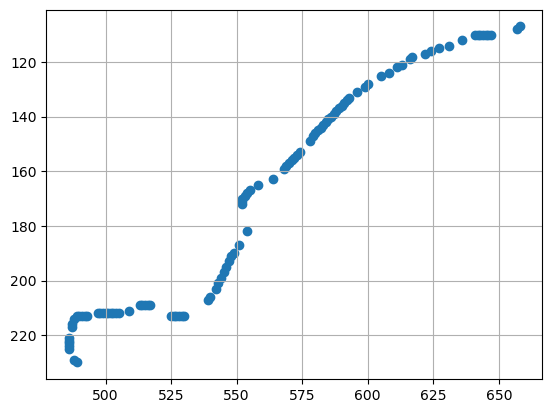

In [369]:
plt.scatter(x_half, y_half)
plt.grid(True)
plt.gca().invert_yaxis()

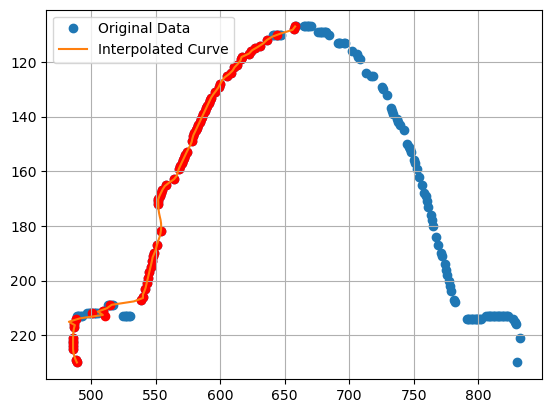

In [370]:
# Alternatively, you can average the y values for duplicate x values
from collections import defaultdict

y_to_x = defaultdict(list)
for x, y in zip(x_half, y_half):
    y_to_x[y].append(x)

unique_y = np.array(sorted(y_to_x.keys()))
unique_x = np.array([np.mean(y_to_x[y]) for y in unique_y])

# Create the interpolation function
f = interp1d(unique_y, unique_x, kind='quadratic')

# Generating more points for smoother interpolation
y_curve1 = np.linspace(min(unique_y), max(unique_y), 100)
x_curve1 = f(y_curve1)

# Plotting
plt.plot(x_main_edge, y_main_edge, 'o', label='Original Data', zorder=0)
plt.plot(x_curve1, y_curve1, '-', label='Interpolated Curve')
plt.scatter(unique_x, unique_y, color = 'red', zorder=1)
plt.gca().invert_yaxis()

#plt.xlim(420, 460)
#plt.ylim(232, 220)
plt.legend()
plt.grid(True)
plt.show()

In [371]:
index_min_x = np.argmax(y_curve1)
y_at_min_x = y_curve1[index_min_x]
index_min_x, y_at_min_x

(99, 230.0)

In [372]:
x_curve1[index_min_x-1]

487.78705618701474

In [373]:
dx = x_curve1[index_min_x-1] - x_curve1[index_min_x]

In [374]:
dx_new>0

True

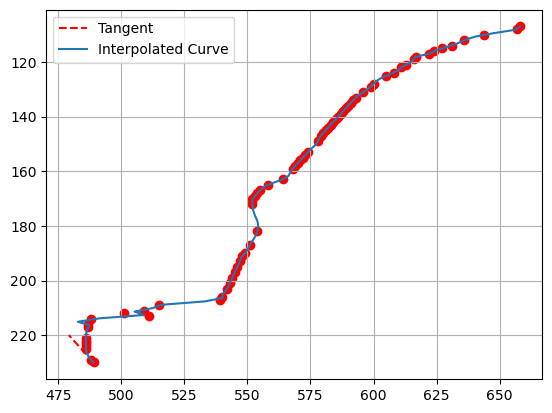

In [375]:
# calculate the derivative at the point
dx_new = x_curve1[index_min_x-1] - x_curve1[index_min_x]
if dx_new>0:
    dx = -dx_new
if dx_new<0:
    dx = np.abs(dx_new)

#dx = np.abs(x_curve1[index_min_x-1] - x_curve1[index_min_x] )
dy_dx = np.gradient(y_curve1, dx)
slope_at_min_x1 = dy_dx[index_min_x]

# tangent line
y_tangent1 = np.linspace(max(y_curve1), max(y_curve1)-10, 100)
x_tangent1 = ( 1/slope_at_min_x1 ) * (y_tangent1 - y_curve1[index_min_x]) + x_curve1[index_min_x]


plt.plot(x_tangent1, y_tangent1, color='red', linestyle='--', label='Tangent') 

plt.scatter(unique_x, unique_y, color = 'red', zorder=1)
plt.grid(True)
plt.plot(x_curve1, y_curve1, label='Interpolated Curve')

plt.legend()
plt.gca().invert_yaxis()

#plt.xlim(433, 440)
#plt.ylim(231, 229)

plt.show()

In [376]:
angle_tangent_degrees_left = np.degrees(np.arctan(slope_at_min_x1))
# Measure angle on right side of interpolation 

if angle_tangent_degrees_left<0:
    angle = np.abs(angle_tangent_degrees_left)

if angle_tangent_degrees_left>0:
    angle = 180 - angle_tangent_degrees_left

In [377]:
angle 

134.3121100426323

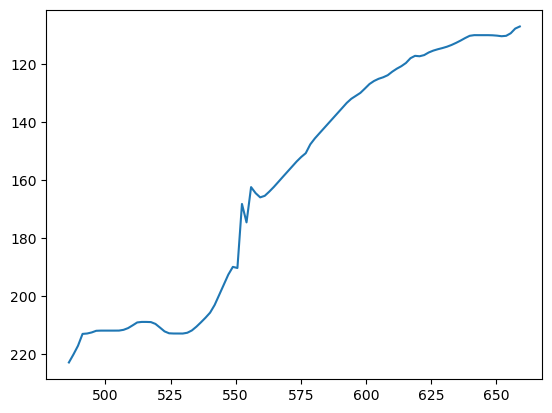

In [807]:
plt.gca().invert_yaxis()
plt.scatter(x_curve1, y_curve1, '-', label='Interpolated Curve')

In [808]:
index_min_x = np.argmax(y_curve1)
y_at_min_x = y_curve1[index_min_x]
index_min_x, y_at_min_x

(0, 223.0)

In [809]:
x_curve1[0]

486.0

In [810]:
starting_xvals1[1]

403.9996871948242

In [811]:
y_curve1[index_min_x]

223.0

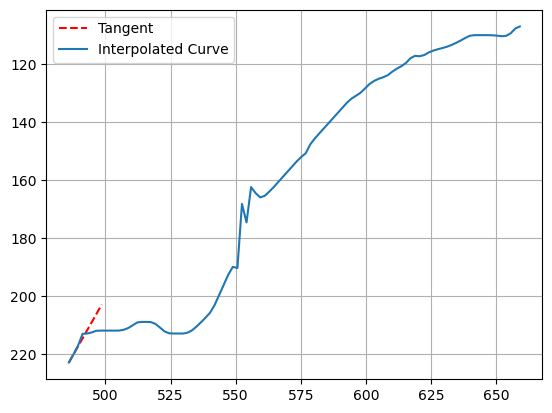

In [812]:
# calculate the derivative at the point
dx = x_curve1[1] - x_curve1[0]
dy_dx = np.gradient(y_curve1, dx)
slope_at_min_x1 = dy_dx[index_min_x]

# tangent line
y_tangent1 = np.linspace(max(y_curve1), max(y_curve1)-20, 100)
x_tangent1 = ( 1/slope_at_min_x1 ) * (y_tangent1 - y_curve1[index_min_x]) + x_curve1[index_min_x]


plt.plot(x_tangent1, y_tangent1, color='red', linestyle='--', label='Tangent') 
plt.grid(True)
plt.plot(x_curve1, y_curve1, label='Interpolated Curve')

plt.legend()
plt.gca().invert_yaxis()

plt.show()

In [813]:
angle_tangent_degrees_left = np.degrees(-np.arctan(slope_at_min_x1))
angle_tangent_degrees_left

57.77910386981203

# 1.3.2) Polynomial Fitting to lower points

In [814]:
def filter_lowest_x_points(x, y, num_points):
    """
    Filter the points to only consider those with the lowest num_points values of x
    """
    
    # Combine x and y into a list of tuples
    data = list(zip(x, y))
    
    # Sort the data by x values
    data.sort(key=lambda point: point[0])
    
    # Select the first num_points points
    filtered_data = data[:num_points]
    
    # Separate the filtered data into x and y components
    x_filtered, y_filtered = zip(*filtered_data)

    return x_filtered, y_filtered

In [815]:
x_left, y_left = filter_lowest_x_points(x_curve1, y_curve1, num_points = 20)

(231.0, 150.0)

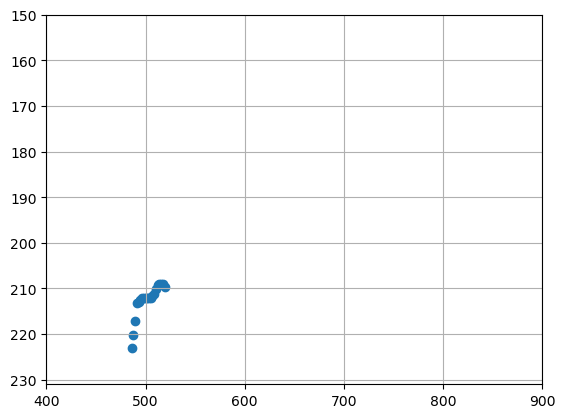

In [816]:
plt.scatter(x_left, y_left)
plt.grid(True)
plt.gca().invert_yaxis()

plt.xlim(400, 900)
plt.ylim(231, 150)

C:\Users\josep\AppData\Local\Temp\ipykernel_20244\399155224.py:3: RankWarning: Polyfit may be poorly conditioned
  coefficients1 = np.polyfit(y_left, x_left, degree)


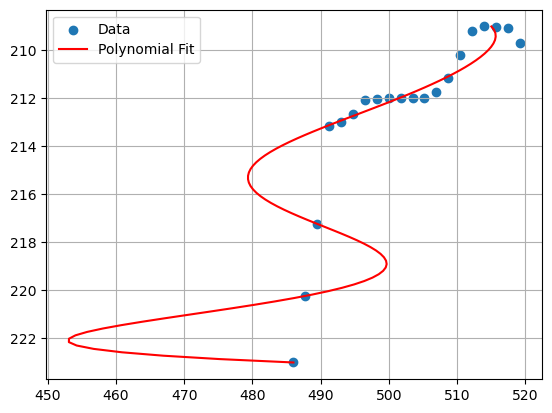

In [817]:
# Perform polynomial regression
degree = 10
coefficients1 = np.polyfit(y_left, x_left, degree)
poly_function1 = np.poly1d(coefficients1)

# Generate points for the curve
y_curve1 = np.linspace(min(y_left), max(y_left), 100)  
x_curve1 = poly_function1(y_curve1)

# Plot the data and the curve
plt.scatter(x_left, y_left, label='Data')
plt.plot(x_curve1, y_curve1, color='red', label='Polynomial Fit')
plt.grid(True)
plt.gca().invert_yaxis()
#plt.xlim(400, 900)  # Set x-axis limits
plt.legend()
plt.show()

In [818]:
contact_point_ind = np.where(np.array(y_left)==230)

In [819]:
bottom_ind = np.where( np.array(y_left) == 230)

In [820]:
np.array(x_left)[bottom_ind][0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [821]:
def lowest_indices(array):
    if len(array) < 2:
        raise ValueError("Array must have at least two elements")

    # Find the indices of the two lowest values
    sorted_indices = sorted(range(len(array)), key=lambda i: array[i])
    lowest_indices = sorted_indices[len(array)-2:]

    # Return the indices of the two lowest values
    return lowest_indices

In [822]:
lowest_indices1 = lowest_indices(y_curve1)
lowest_indices1

[98, 99]

In [823]:
starting_xvals1 = x_curve1[lowest_indices1]
starting_xvals1

array([475.18371582, 486.00817871])

In [824]:
starting_xvals1

array([475.18371582, 486.00817871])

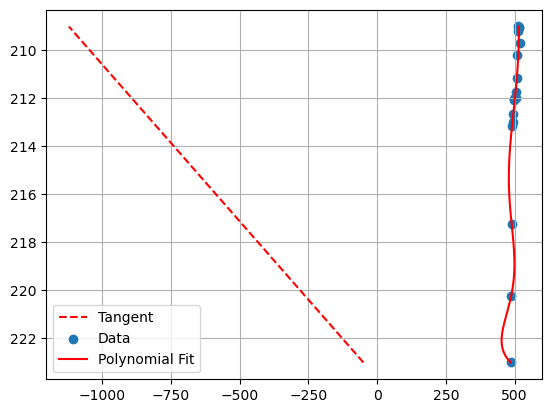

In [825]:
dx1 = starting_xvals1[1] - starting_xvals1[0]
dy_dx1 = np.gradient(y_curve1, dx1)
slope_at_min_x1 = dy_dx1[lowest_indices1[1]]

# tangent line
#x_tangent = np.linspace(min(x_curve), max(x_curve), 100)
#y_tangent = slope_at_min_x * (x_tangent - 413) + 230

y_tangent1 = np.linspace(max(y_curve1), min(y_curve1), 100)
x_tangent1 = ( 1/slope_at_min_x1 ) * (y_tangent1 - 230) + starting_xvals1[1]

plt.plot(x_tangent1, y_tangent1, color='red', linestyle='--', label='Tangent')
plt.grid(True)

# Plot the data and the curve
plt.scatter(x_left, y_left, label='Data')
plt.plot(x_curve1, y_curve1, color='red', label='Polynomial Fit')
plt.grid(True)
plt.gca().invert_yaxis()
#plt.xlim(400, 440)  
#plt.ylim(230,225)
plt.legend()
plt.show()

In [826]:
angle_tangent_degrees_left = np.degrees(-np.arctan(slope_at_min_x1))

In [827]:
angle_tangent_degrees_left

-0.7485281772478432

In [633]:
contact_point_ind = np.where(y_main_edge== 230)
contact_point_ind

(array([0, 1], dtype=int64),)

In [634]:
np.min(x_main_edge[contact_point_ind])
# where the left point is in x

436.0

In [635]:
index_of_left = np.where(x_main_edge == np.min(x_main_edge[contact_point_ind]) )[0][0]
index_of_left

0

In [636]:
x_main_edge[index_of_left], y_main_edge[index_of_left]

(436.0, 230.0)

In [637]:
def lowest_indices(array):
    if len(array) < 2:
        raise ValueError("Array must have at least two elements")

    # Find the indices of the two lowest values
    sorted_indices = sorted(range(len(array)), key=lambda i: array[i])
    lowest_indices = sorted_indices[len(array)-2:]

    # Return the indices of the two lowest values
    return lowest_indices

In [638]:
lowest_indices1 = lowest_indices(y_curve1)
lowest_indices1

[1, 0]

In [639]:
x_curve1[lowest_indices1]

array([438.33333333, 436.        ])

In [640]:
y_curve1[lowest_indices1]

array([229.05866405, 230.        ])

In [641]:
starting_xvals1 = x_curve1[lowest_indices1]
starting_xvals1

array([438.33333333, 436.        ])

In [642]:
x_curve1[lowest_indices1[1]]

436.0

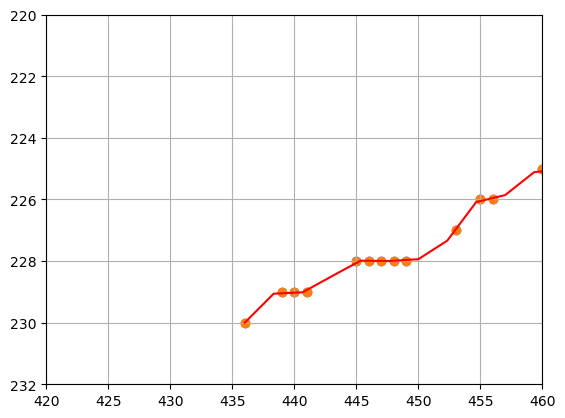

In [644]:
plt.scatter(x_main_edge, y_main_edge)
plt.scatter(unique_x, unique_y)
plt.grid(True)
plt.gca().invert_yaxis()

# Plotting interpolated data
plt.plot(x_curve1, y_curve1, 'r-')
plt.xlim(420, 460)
plt.ylim(232, 220)

plt.show()

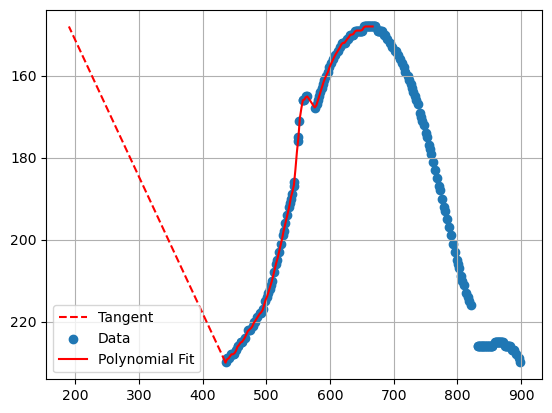

In [577]:
dx1 = starting_xvals1[1] - starting_xvals1[0]
dy_dx1 = np.gradient(y_curve1, dx1)
slope_at_min_x1 = dy_dx1[lowest_indices1[1]]

# tangent line
#x_tangent = np.linspace(min(x_curve), max(x_curve), 100)
#y_tangent = slope_at_min_x * (x_tangent - 413) + 230

y_tangent1 = np.linspace(max(y_curve1), min(y_curve1), 100)
x_tangent1 = ( 1/slope_at_min_x1 ) * (y_tangent1 - 230) + starting_xvals1[1]

plt.plot(x_tangent1, y_tangent1, color='red', linestyle='--', label='Tangent')
plt.grid(True)

# Plot the data and the curve
plt.scatter(x_main_edge, y_main_edge, label='Data')
plt.plot(x_curve1, y_curve1, color='red', label='Polynomial Fit')
plt.grid(True)
plt.gca().invert_yaxis()
#plt.xlim(435, 440)  
#plt.ylim(230,225)
plt.legend()
plt.show()

In [564]:
angle_tangent_degrees_left = np.degrees(-np.arctan(slope_at_min_x1))

In [565]:
angle_tangent_degrees_left

-18.43494882292201

## 1.4) Right Points

In [429]:
def filter_highest_x_points(x, y, num_points):
    """
    Filter the points to only consider those with the highest num_points values of x
    """
    
    # Combine x and y into a list of tuples
    data = list(zip(x, y))
    
    # Sort the data by x values
    data.sort(key=lambda point: point[0])
    
    # Select the last num_points points
    filtered_data = data[-num_points:]
    
    # Separate the filtered data into x and y components
    x_filtered, y_filtered = zip(*filtered_data)

    return x_filtered, y_filtered

In [430]:
x_right, y_right = filter_highest_x_points(x_main_edge, y_main_edge, num_points = 20)

(400.0, 950.0)

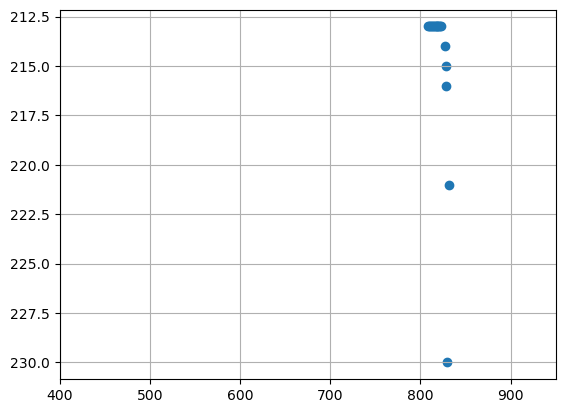

In [431]:
plt.scatter(x_right, y_right)
plt.grid(True)
plt.gca().invert_yaxis()

plt.xlim(400, 950)

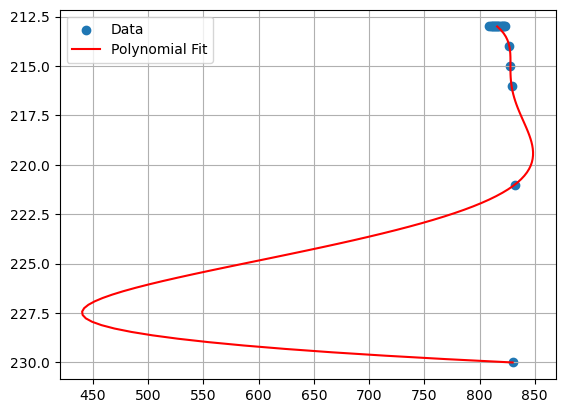

In [438]:
# Perform polynomial regression
degree = 5
coefficients2 = np.polyfit(y_right, x_right, degree)
poly_function2 = np.poly1d(coefficients2)

# Generate points for the curve
y_curve2 = np.linspace(min(y_right), max(y_right), 100)  
x_curve2 = poly_function2(y_curve2)

# Plot the data and the curve
plt.scatter(x_right, y_right, label='Data')
plt.plot(x_curve2, y_curve2, color='red', label='Polynomial Fit')
plt.grid(True)
plt.gca().invert_yaxis()
#plt.xlim(400, 950)  # Set x-axis limits
plt.legend()
plt.show()

In [399]:
def lowest_indices(array):
    if len(array) < 2:
        raise ValueError("Array must have at least two elements")

    # Find the indices of the two lowest values
    sorted_indices = sorted(range(len(array)), key=lambda i: array[i])
    lowest_indices = sorted_indices[len(array)-2:]

    # Return the indices of the two lowest values
    return lowest_indices

In [400]:
lowest_indices2 = lowest_indices(y_curve2)
lowest_indices2

[98, 99]

In [401]:
y_curve2[lowest_indices2]

array([229.82828283, 230.        ])

In [402]:
starting_xvals2 = x_curve2[lowest_indices2]
starting_xvals2

array([769.10068226, 829.9999752 ])

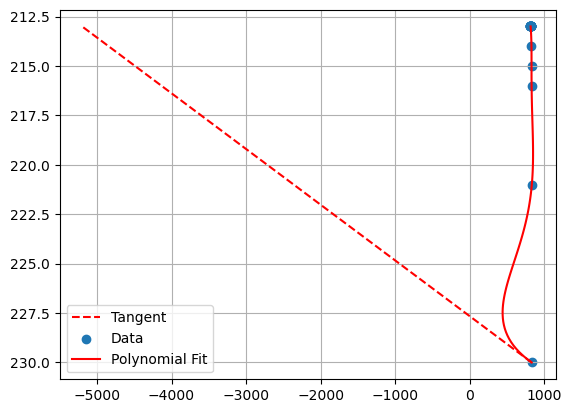

In [403]:
dx2 = starting_xvals2[1] - starting_xvals2[0]
dy_dx2 = np.gradient(y_curve2, dx2)
slope_at_min_x2 = dy_dx2[lowest_indices2[1]]

# tangent line
#x_tangent = np.linspace(min(x_curve), max(x_curve), 100)
#y_tangent = slope_at_min_x * (x_tangent - 413) + 230

y_tangent2 = np.linspace(max(y_curve2), min(y_curve2), 100)
x_tangent2 = ( 1/slope_at_min_x2 ) * (y_tangent2 - 230) + starting_xvals2[1]

plt.plot(x_tangent2, y_tangent2, color='red', linestyle='--', label='Tangent')
plt.grid(True)

# Plot the data and the curve
plt.scatter(x_right, y_right, label='Data')
plt.plot(x_curve2, y_curve2, color='red', label='Polynomial Fit')
plt.grid(True)
plt.gca().invert_yaxis()
#plt.xlim(400, 440)  
#plt.ylim(230,225)
plt.legend()
plt.show()

In [404]:
angle_tangent_degrees_right = np.degrees(-np.arctan(slope_at_min_x2))

In [405]:
angle_tangent_degrees_right

-0.1615559501415561